In [81]:
!pip3 install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [82]:
import pandas as pd
# load file
df = pd.read_csv('hurricanes.csv')
df

,year,month,hurricanes
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


Read hurricanes data from hurricanes.csv into a pandas data frame. 

Find the average number of hurricanes per quarter (spring is jan thru march, summer is april thru june, fall is july through september, winter is october through december) for years nineteen-fifty to nineteen-fiftynine, which includes years nineteen-fifty as well as nineteen-fiftynine, and tabulate them. Also, the standard deviation per quarter.

Also, plot the number of hurricanes per quarter and for all years, and plot standard deviation using intervals on the plot itself.

In [83]:
# filter the data by year
new_df = df.copy()
new_df = new_df[(new_df['year']>=1950) & (new_df['year']<=1959)]
filter_df_by_year = new_df
filter_df_by_year

,year,month,hurricanes
12,1950,January,115
13,1950,February,126
14,1950,March,141
15,1950,April,135
16,1950,May,125
...,...,...,...
127,1959,August,559
128,1959,September,463
129,1959,October,407
130,1959,November,362


In [84]:
# set the quarter
month_to_quarter = {
    'Spring': ['January', 'February', 'March'],
    'Summer': ['April', 'May', 'June'],
    'Fall': ['July', 'August', 'September'],
    'Winter': ['October', 'November', 'December']
}
# change to quarter_to_month
quarter_to_month = {}
for quarter, months in month_to_quarter.items():
    for month in months:
        quarter_to_month[month] = quarter
quarter_to_month

{'January': 'Spring',
 'February': 'Spring',
 'March': 'Spring',
 'April': 'Summer',
 'May': 'Summer',
 'June': 'Summer',
 'July': 'Fall',
 'August': 'Fall',
 'September': 'Fall',
 'October': 'Winter',
 'November': 'Winter',
 'December': 'Winter'}

In [85]:
# One-line Code
quarter_to_month_1 = {month: quarter for quarter, months in month_to_quarter.items() for month in months}
quarter_to_month_1

{'January': 'Spring',
 'February': 'Spring',
 'March': 'Spring',
 'April': 'Summer',
 'May': 'Summer',
 'June': 'Summer',
 'July': 'Fall',
 'August': 'Fall',
 'September': 'Fall',
 'October': 'Winter',
 'November': 'Winter',
 'December': 'Winter'}

In [86]:
# set quarter column in new_df
new_df['quarter'] = new_df['month'].map(quarter_to_month_1)
new_df

,year,month,hurricanes,quarter
12,1950,January,115,Spring
13,1950,February,126,Spring
14,1950,March,141,Spring
15,1950,April,135,Summer
16,1950,May,125,Summer
...,...,...,...,...
127,1959,August,559,Fall
128,1959,September,463,Fall
129,1959,October,407,Winter
130,1959,November,362,Winter


In [96]:
# get mean of hurricanes in each quarter
group_by_quarter = new_df.groupby('quarter')['hurricanes']
mean_per_quarter = group_by_quarter.mean()
mean_per_quarter

quarter
Fall      329.666667
Spring    245.800000
Summer    278.466667
Winter    250.366667
Name: hurricanes, dtype: float64

In [97]:
std_per_quarter = group_by_quarter.std()
std_per_quarter

quarter
Fall      121.686520
Spring     81.581523
Summer     98.403369
Winter     84.455858
Name: hurricanes, dtype: float64

In [98]:
quarters = month_to_quarter.keys()
quarters

dict_keys(['Spring', 'Summer', 'Fall', 'Winter'])

In [104]:
hurricanes_std = std_per_quarter.values
hurricanes_std

array([121.68652019,  81.58152259,  98.40336879,  84.45585802])

In [105]:
hurricanes_mean = mean_per_quarter.values
hurricanes_mean

array([329.66666667, 245.8       , 278.46666667, 250.36666667])

In [106]:
!pip3 install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [107]:
import matplotlib.pyplot as plt

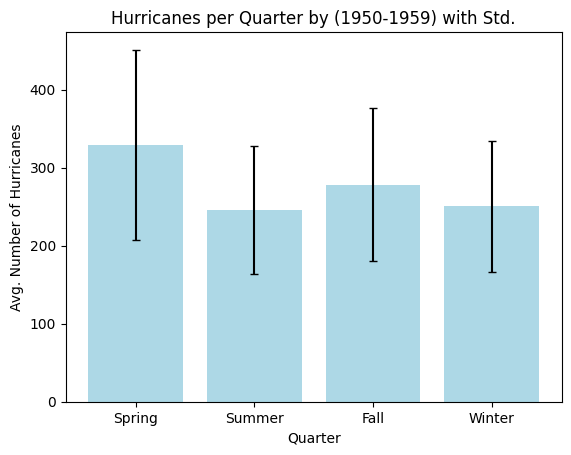

In [121]:
plt.figure()
plt.bar(quarters, hurricanes_mean, yerr=hurricanes_std, capsize=3, color='lightblue')
plt.xlabel('Quarter')
plt.ylabel('Avg. Number of Hurricanes')
plt.title('Hurricanes per Quarter by (1950-1959) with Std.')
plt.show()